# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 

Работа будет с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Описание хода работы

Шаг 1. Открыть файлы с данными и объединить их в один датафрейм

Пути к файлам:

     datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 

     datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

Шаг 2. Выполнить предобработку данных

1. Проверить типы данных в датафрейме и преобразовать там, где это необходимо.
2. Изучить пропуски в датафрейме. Объяснить, почему заполнены пропуски определённым образом.
3. Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.
4. Изучить столбцы, которые содержат категориальные значения:
    - Найти, какая общая проблема встречается почти во всех категориальных столбцах;
    - Исправить проблемные значения в поле type.
5. Изучить столбцы, которые хранят количественные значения. Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?
6. Добавить новые столбцы:
    - Создать столбец с информацией о годе проката. Выделить год из даты премьеры фильма;
    - Создать два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
    - Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

Шаг 3. Провести исследовательский анализ данных

- Посмотреть, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализировать, как эта доля менялась по годам. Сделать вывод о том, какой период полнее всего представлен в данных.
- Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.
- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.

Шаг 4. Исследовать фильмы, которые получили государственную поддержку

Шаг 5. Написать общий вывод

## Настройки рабочей тетради

In [1]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
# Настройки библиотек


# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [3]:
# Путь к директории с данными

path = 'datasets/'

## Шаг 1. Открыть файлы с данными и объединить их в один датафрейм

In [4]:
# Посмотрим на полученные данные

data1 = pd.read_csv(os.path.join(path, 'mkrf_movies.csv'))
data2 = pd.read_csv(os.path.join(path, 'mkrf_shows.csv'))

display(data1.head())
data1.info()
display(data2.head())
data2.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
# Строки, которые не дают нам изменить тип данных
display(data1[data1['puNumber'] == 'нет'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Всего одна строка, в которой половина значений в столбцах неизвестны. 
# Можно удалить и изменить тип данных в столбце для объединения датафреймов.

data1 = data1.drop(index=1797)
data1 = data1.astype({'puNumber' : 'int'})

data = data1.merge(data2, on='puNumber', how='left')
display(data.head())
data.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<b>Вывод</b>

Столбцы "refundable_support", "nonrefundable_support", "budget", "financing_source" имеют всего 332 заполненных значения, что странно. Все столбцы типа object привести к нижнему регистру, заменить "ё" на "е". Остальные необходимые изменения внесены в таблицу.

| Столбец            | Замена типа   | Пропуски     |
| :------------------|:-------------:| :-----------:|
| film_studio        | не требуется  | 'unknown'    |
| production_country | не требуется  | 'unknown'    |
| director           | не требуется  | 'unknown'    |
| producer	         | не требуется  | 'unknown'    |
| genres	         | не требуется  | 'unknown'    |
| box_office         | не требуется  | 0            |
| ratings            | float         | оставить     |
| age_restriction    | int           | отсутствуют  |
| show_start_date    | datetime      | отсутствуют  |


## Шаг 2. Выполнить предобработку данных

### Проверить типы данных в датафрейме и преобразовать там, где это необходимо.

In [7]:
# Посмотрим, почему 'ratings' считается стобцом типа object
print(data['ratings'].unique())

['7.2' '6.6' '6.8' '7.7' '8.3' '8.0' '7.8' '8.1' '7.1' '6.0' '7.4' '5.8'
 '8.7' '6.3' '6.9' '5.0' '4.3' '7.3' '7.0' '6.4' nan '8.2' '7.5' '6.7'
 '7.9' '5.9' '6.2' '5.6' '6.5' '2.4' '7.6' '6.1' '8.6' '8.5' '8.8' '5.5'
 '5.1' '5.7' '5.4' '99%' '4.4' '4.5' '5.3' '4.1' '8.4' '2.6' '3.8' '4.6'
 '4.8' '4.0' '3.0' '1.6' '4.2' '5.2' '4.7' '4.9' '3.9' '2.7' '3.3' '2.9'
 '28%' '3.7' '1.4' '3.1' '97%' '3.5' '3.2' '2.8' '1.5' '2.1' '2.5' '9.2'
 '3.4' '1.1' '3.6' '83%' '64%' '91%' '94%' '62%' '79%' '90%' '19%' '88%'
 '1.0' '89%' '1.3' '1.9' '1.8' '1.2' '1.7' '9.0' '98%' '8.9' '9.1']


In [8]:
# Изменение типа в стобце 'ratings'
for i in range(len(data['ratings'])):
    try:
        data.loc[i, 'ratings'] = float(data.loc[i, 'ratings'])
    except:
        data.loc[i, 'ratings'] = float(data.loc[i, 'ratings'][:2])/10
        
data = data.astype({'ratings' : 'float'})

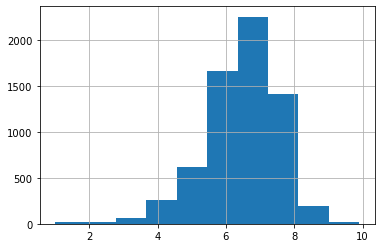

In [9]:
# удалим символы процента и преобразуем в число
data['ratings'] = data['ratings'].astype('str').replace('%', '').astype('float')
# все числа больше 10, поделим на 10
data['ratings'] = data['ratings'].where(data['ratings'] <= 10, data['ratings'] / 10)

# построим гистограмму
data['ratings'].hist();

In [10]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [11]:
# Изменение типа в столбце 'age_restriction'
for i in range(len(data['age_restriction'])):
    if '1' in data.loc[i, 'age_restriction']:
        data.loc[i, 'age_restriction'] = int(data.loc[i, 'age_restriction'][1:3])
    else:
        data.loc[i, 'age_restriction'] = int(data.loc[i, 'age_restriction'][1:2])
        
# Изменение типа в столбце 'show_start_date'
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [12]:
data['age_restriction'].value_counts()

16    2851
18    1605
12    1592
0      811
6      626
Name: age_restriction, dtype: int64

### Изучить пропуски в датафрейме. Объяснить, почему заполнены пропуски определённым образом.

In [13]:
data[['genres', 'producer', 'director', 'production_country', 'film_studio']] = data[['genres', 'producer', 'director', 'production_country', 'film_studio']].fillna('unknown')

data[['box_office']] = data[['box_office']].fillna(0)

data['ratings'] = data['ratings'].fillna(data['ratings'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7485 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

В столбцах "financing_source", "budget", "nonrefundable_support", "refundable_support" были оставлены пропущенные значения, потому что столбцы имеют всего 332 заполненных значений, заполнять остальные средним или медианой будет явным искажением данных, заполнять стандартными 0 или 'unknown' тоже кажется некорректно.

В "box_office" пропущенные значения заполнены 0, потому что вполне логично предположить, что если данные о сборах не указаны, то фильм в прокате не был и сами сборы равны нулю, т.к. эта информация пришла из отдельной таблицы о прокате в кинотеатрах.

В "ratings" пропущенные значения заполнены средним, потому что таких значений не так много, и разница между средним и медианой почти равна нулю.

Остальные столбцы с категориальными значениями были заполнены "unknown", т.к. целесообразно выделить значения в которых отстутвует какая-то информация в отдельную категорию, а не пропускать их.

### Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.

In [14]:
list_to_low = ['genres', 'producer', 'director', 'production_country', 'film_studio', 'title', 'type', 'financing_source']
for i in list_to_low:
    data[i] = data[i].str.lower()
    data[i] = data[i].str.replace('ё', 'е')
    
print(data.duplicated().sum())
print(data['title'].duplicated().sum())
print(data[['title', 'show_start_date']].duplicated().sum())

0
726
8


In [15]:
display(data[data['title'].duplicated()].head())
display(data[data[['title', 'show_start_date']].duplicated()].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0
41,алекс и эмма,221004616,2016-02-09 12:00:00,художественный,"эскейп артистс, франчайз пикчерз, рейнер-грэйс...",сша,роб райнер,"тодд блэк, элан грейсман, джереми левен, роб р...",16,NaN,NaN,NaN,NaN,6.4,"мелодрама,комедия",0.0
110,гарри поттер и орден феникса /по роману дж.к.р...,121026316,2016-09-23 12:00:00,художественный,"уорнер бразерс, хэйдей филмз",сша - великобритания,дэвид йетс,"дэйвид баррон, дэйвид хейман",16,NaN,NaN,NaN,NaN,7.7,"фэнтези,приключения,семейный",759526.0
113,гарри поттер и узник азкабана /по роману дж.к....,121026116,2016-09-23 12:00:00,художественный,"хэйдей филмз, 1492 пикчерз, уорнер бразерс",сша,альфонсо куарон,майкл барната,12,NaN,NaN,NaN,NaN,8.2,"фэнтези,приключения,семейный",1125302.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1301,эпидемия_,221035513,2013-10-07 12:00:00,художественный,"морена фильм, ребелион террестр, а 3 медиа гру...",испания - франция,"алекс пастор, давид пастор","мерседес гамеро, альберто марини, педро уриоль",16,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",0.0
1476,оторвы,221013214,2014-04-07 12:00:00,художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",сша,кристофер нельсон,"молли коннерс, хезер рэй",16,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",0.0
2191,последние пять лет.,121005715,2015-03-25 12:00:00,художественный,"гранд пикс интертейнмент, лаки манки пикчерз, ...",сша,ричард лагравенес,"джанет бреннер, лорен версель, курт дойтч, рич...",16,NaN,NaN,NaN,NaN,5.7,"мюзикл,драма,мелодрама",52495.0
2752,пингвиненок пороро: большие гонки,124001915,2015-04-15 12:00:00,анимационный,"окон студиос, чина филм, симка интертейнмент, ...",южная корея - кнр,юнг куюн парк,"иль хо ким, михал симка",0,NaN,NaN,NaN,NaN,5.2,"мультфильм,семейный,спорт",14152495.9
3086,анархисты,121002316,2016-02-03 12:00:00,художественный,"24 май продюксьон, франс 2 синема",франция,эли важеман,лола гэнс,16,NaN,NaN,NaN,NaN,5.7,драма,332371.0


In [16]:
# Посмотрим на строки где дублируются и название, и дата
display(data.loc[1300:1301, :])
display(data.loc[1475:1476, :])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1300,эпидемия_,121025713,2013-10-07 12:00:00,художественный,"морена фильм, ребелион террестр, а 3 медиа гру...",испания - франция,"алекс пастор, давид пастор","мерседес гамеро, альберто марини, педро уриоль",16,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",0.0
1301,эпидемия_,221035513,2013-10-07 12:00:00,художественный,"морена фильм, ребелион террестр, а 3 медиа гру...",испания - франция,"алекс пастор, давид пастор","мерседес гамеро, альберто марини, педро уриоль",16,NaN,NaN,NaN,NaN,7.2,"драма,фантастика,триллер",0.0


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1475,оторвы,121006514,2014-04-07 12:00:00,художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",сша,кристофер нельсон,"молли коннерс, хезер рэй",16,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",0.0
1476,оторвы,221013214,2014-04-07 12:00:00,художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",сша,кристофер нельсон,"молли коннерс, хезер рэй",16,NaN,NaN,NaN,NaN,3.5,"комедия,приключения",0.0


Дубликаты фильмов в данных есть, большая часть связана с тем, что возможно фильм был зарегистрирован в прокат ещё раз через какое-то время (дубликаты в названии). Что касается дубликатов в названии и в дате, то можно предположить, что документы на прокатное удостоверение были поданы несколькими людьми в один день(продюсер и прокатчик, например)

### Изучить столбцы, которые содержат категориальные значения:

In [17]:
data['type'] = data['type'].str.strip()

display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",0.0
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,6,NaN,NaN,NaN,NaN,6.6,"драма,военный",0.0
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0


### Изучить столбцы, которые хранят количественные значения.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   puNumber               7485 non-null   int32         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7485 non-null   object        
 5   production_country     7485 non-null   object        
 6   director               7485 non-null   object        
 7   producer               7485 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Как уже сказано выше, 4 столбца "financing_source", "budget", "nonrefundable_support", "refundable_support" выглядят подозрительно из-за малого количества заполненных данных. Думаю, что такие данные лучше оставить или, может, выделить в отдельную таблицу.

### Добавить новые столбцы

In [19]:
data['year'] = data['show_start_date'].dt.year

In [20]:
data['main_director'] = data['director'].str.split(',')
data['main_genre'] = data['genres'].str.split(',')
for i in range(len(data['main_director'])):
    data.loc[i, 'main_director'] = data.loc[i, 'main_director'][0]
    data.loc[i, 'main_genre'] = data.loc[i, 'main_genre'][0]

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [21]:
data['support_part'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']

In [22]:
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_part
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",18,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",0.0,2015,кевин костнер,боевик,NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,unknown,6,NaN,NaN,NaN,NaN,6.6,"драма,военный",0.0,2016,е.матвеев,драма,NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0,2016,тимур бекмамбетов,фантастика,NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0,2016,тимур бекмамбетов,фантастика,NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",18,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",0.0,2015,тимур бекмамбетов,фантастика,NaN


## Провести исследовательский анализ данных

### Посмотреть, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [23]:
films_year = data[data['box_office'] != 0].pivot_table(index='year', values='box_office', aggfunc='count')
films_year = films_year.rename(columns={'box_office':'number'})
display(films_year)

print('Доля фильмов с указанной информацией о прокате в кинотеатрах равна', 
      round(data[data['box_office'] != 0]['title'].count()/data['title'].count(), 4))

,number
year,
2010,101
2011,109
2012,123
2013,179
2014,273
2015,462
2016,525
2017,357
2018,475


Доля фильмов с указанной информацией о прокате в кинотеатрах равна 0.4187


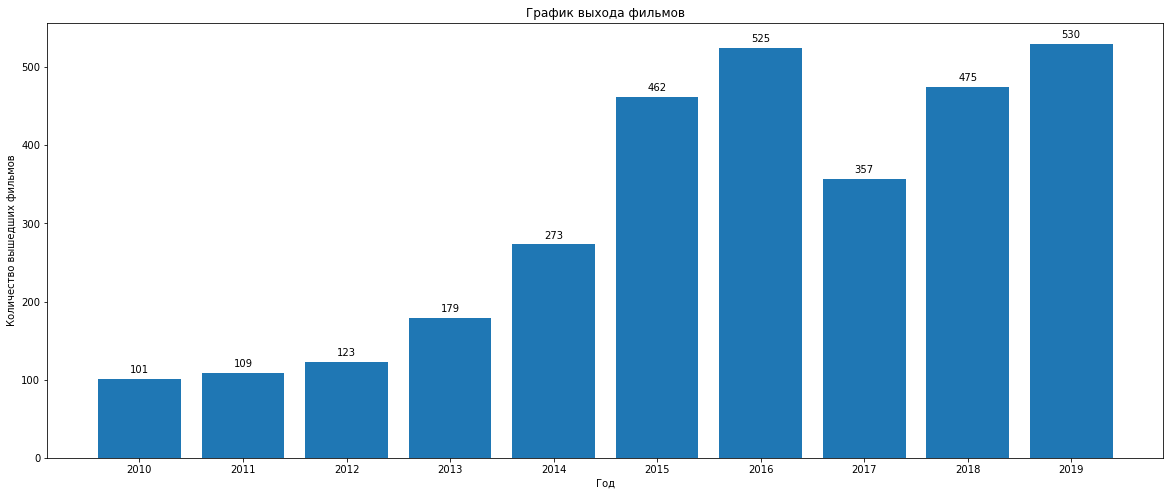

In [24]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
ax1.bar(films_year.index, films_year['number'])
ax1.set_xticks(films_year.index)
ax1.set_xticklabels(films_year.index)
plt.gca().set(title='График выхода фильмов', ylabel='Количество вышедших фильмов', xlabel='Год')

rects = ax1.patches

labels = list(films_year['number'])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.savefig('plt', bbox_inches = "tight")
    
plt.show()


### Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [25]:
box_year = data.groupby('year', as_index=False)['box_office'].sum()
display(box_year)

print('Минимальная сумма сборов была в', int(box_year[box_year['box_office'] == box_year['box_office'].min()]['year']), 'году')
print('Максимальная сумма сборов была в', int(box_year[box_year['box_office'] == box_year['box_office'].max()]['year']), 'году')

,year,box_office
0,2010,2.428654e+06
1,2011,1.410276e+07
2,2012,6.955423e+06
3,2013,2.979971e+07
4,2014,7.444952e+09
5,2015,3.949737e+10
6,2016,4.786630e+10
7,2017,4.856371e+10
8,2018,4.966840e+10
9,2019,4.842571e+10


Минимальная сумма сборов была в 2010 году
Максимальная сумма сборов была в 2018 году


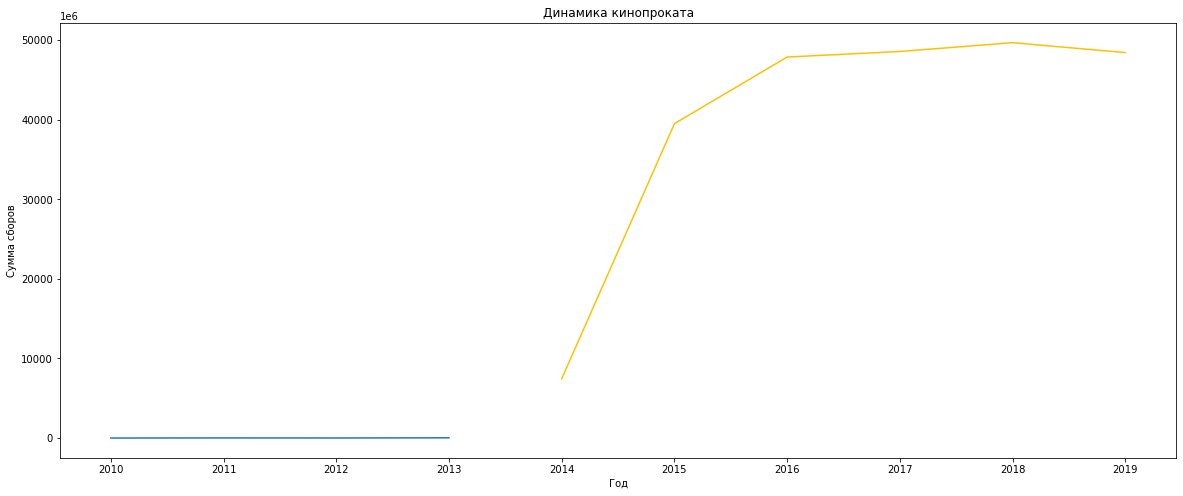

In [53]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
plt.ticklabel_format(scilimits=(6, 6))
#ax1.plot(box_year['year'], box_year['box_office'])
ax1.plot(box_year['year'][:4], box_year['box_office'][:4])
ax1.plot(box_year['year'][4:], box_year['box_office'][4:], color='#ffc001')
#plt.vlines(2013, 0, 5e10, colors = "r", linestyles = "dashed")
ax1.set_xticks(box_year['year'])
ax1.set_xticklabels(box_year['year'])
plt.gca().set(title='Динамика кинопроката', ylabel='Сумма сборов', xlabel='Год')

rects = ax1.patches

labels = list(box_year['box_office'])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.savefig('plt', bbox_inches = "tight")
    
plt.show()

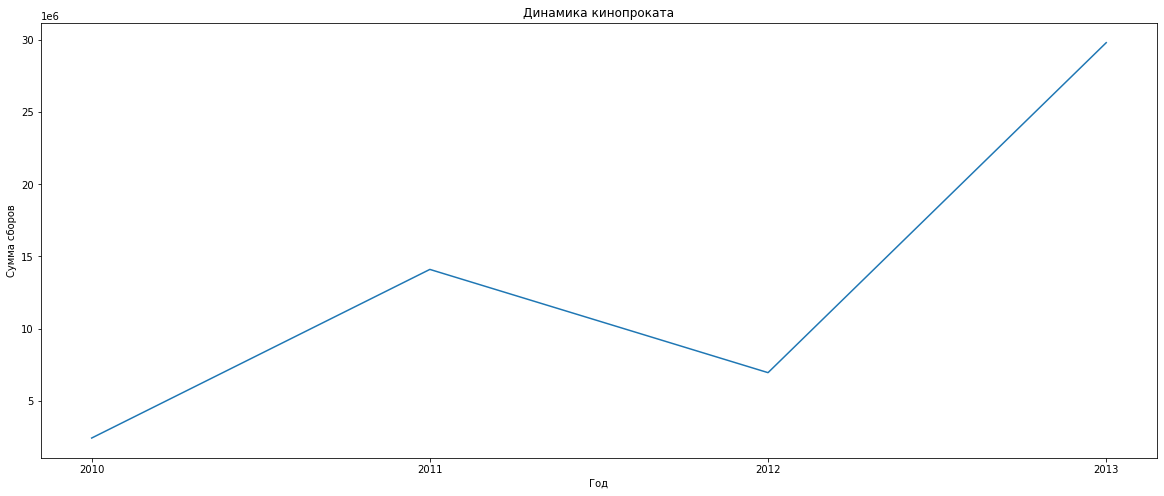

In [54]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
plt.ticklabel_format(scilimits=(6, 6))
ax1.plot(box_year['year'][:4], box_year['box_office'][:4])
ax1.set_xticks(box_year['year'][:4])
ax1.set_xticklabels(box_year['year'][:4])
plt.gca().set(title='Динамика кинопроката', ylabel='Сумма сборов', xlabel='Год')

rects = ax1.patches

labels = list(box_year['box_office'][:4])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.savefig('plt', bbox_inches = "tight")
    
plt.show()

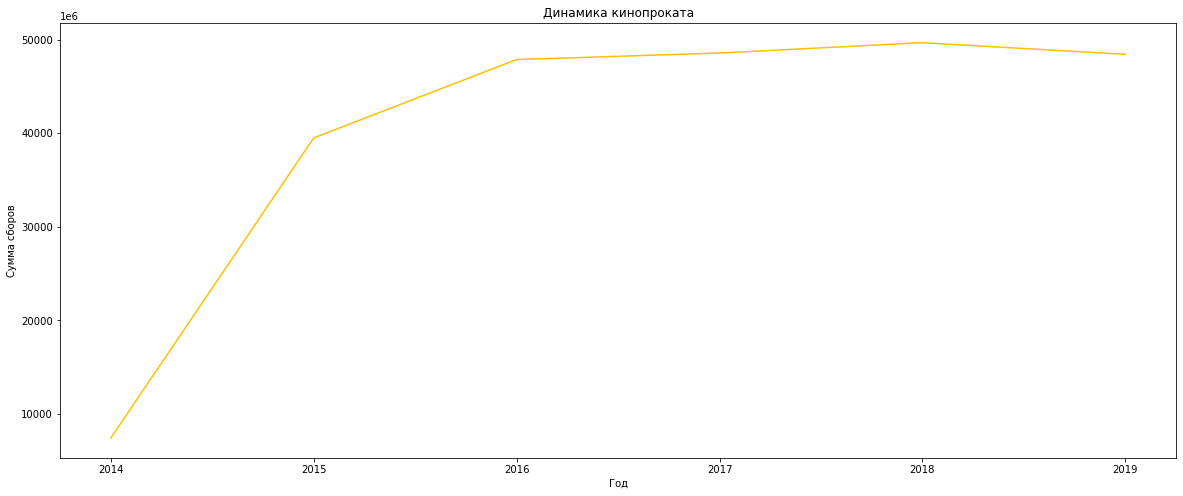

In [55]:
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
plt.ticklabel_format(scilimits=(6, 6))
ax1.plot(box_year['year'][4:], box_year['box_office'][4:], color='#ffc001')
ax1.set_xticks(box_year['year'][4:])
ax1.set_xticklabels(box_year['year'][4:])
plt.gca().set(title='Динамика кинопроката', ylabel='Сумма сборов', xlabel='Год')

rects = ax1.patches

labels = list(box_year['box_office'][4:])

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.savefig('plt', bbox_inches = "tight")
    
plt.show()

### С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.

In [29]:
box_mean_median = data[data['box_office'] != 0].pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).astype('int')
display(box_mean_median)

,mean,median
,box_office,box_office
year,,
2010,24046,1710
2011,129383,3000
2012,56548,6220
2013,166478,3580
2014,27270885,20400
2015,85492132,5003450
2016,91173904,3915041
2017,136032793,9968340


### Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года?

In [30]:
age_box = data[data['year'] > 2014].groupby('age_restriction', as_index=False)['box_office'].sum()
#age_box.set_title('Сумма сборов по возрастным ограничениям в прокате с 2015 по 2019 год')
display(age_box.style.set_caption("Сумма сборов по возрастным ограничениям в прокате с 2015 по 2019 год"))

print('Фильмы с возрастным ограничением ' + 
      str(int(age_box[age_box['box_office'] == age_box['box_office'].max()]['age_restriction'])) + '+', 
      'собрали больше всего денег в прокате')

age_number = data[(data['year'] > 2014) & (data['box_office']!=0)].groupby('age_restriction', as_index=False)['box_office'].count()
age_number = age_number.rename(columns={'box_office':'number'})
display(age_number.style.set_caption("Количество фильмов по возрастным ограничениям в прокате с 2015 по 2019 год"))

,age_restriction,box_office
0,0,809077425.970000
1,6,55798610799.680000
2,12,60619446628.330002
3,16,76034733643.630005
4,18,40759615572.120003


Фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате


,age_restriction,number
0,0,90
1,6,317
2,12,347
3,16,803
4,18,792


age_restriction,0,6,12,16,18
year,,,,,
2015,3.790546e+08,8.701799e+09,1.361608e+10,1.136812e+10,5.432308e+09
2016,1.502288e+08,1.205315e+10,1.220445e+10,1.666455e+10,6.793930e+09
2017,2.295989e+08,1.208614e+10,7.851428e+09,1.874504e+10,9.651496e+09
2018,3.244900e+07,1.010497e+10,1.426729e+10,1.650360e+10,8.760086e+09
2019,1.774607e+07,1.285255e+10,1.268020e+10,1.275342e+10,1.012180e+10


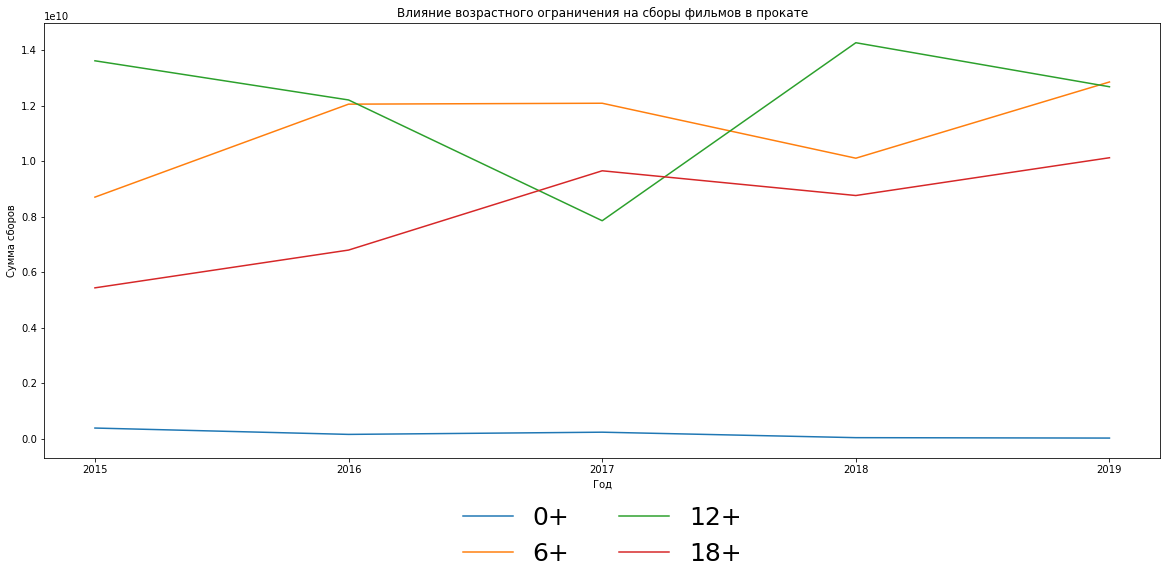

In [71]:
age_year = data.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
age_year = age_year.drop(index=[2010, 2011, 2012, 2013, 2014])
display(age_year)


fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
#plt.ticklabel_format(scilimits=(6, 6))
ax1.set_xticks(age_year.index)
ax1.set_xticklabels(age_year.index)
ax1.plot(age_year.index, age_year[0], label='0+')
ax1.plot(age_year.index, age_year[6], label='6+')
ax1.plot(age_year.index, age_year[12], label='12+')
ax1.plot(age_year.index, age_year[18], label='18+')


plt.gca().set(title='Влияние возрастного ограничения на сборы фильмов в прокате', ylabel='Сумма сборов', xlabel='Год')

rects = ax1.patches
plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(0.25, -0.3, 0.5, 0.5), prop={'size':25}, ncol = 2)

plt.savefig('plt', bbox_inches = "tight")
    
plt.show()

Возрастное ограничение определенно влияет на сборы фильма в прокате, так больше всего денег в прокате собирают фильмы с ограничением 16+, меньше всего - 0+. Очевидными причинами являются разница в количестве выпускаемых фильмов: фильмов 16+ почти в 9 раз больше чем 0+, и посещаемость: на фильмы 0+ ходят заметно меньше людей(даже если увеличить кол-во фильмов 0+, то сумма сборов всё ещё в несколько раз меньше чем у других фильмов). Стоит отметить, что фильмы 18+ также являются малопосещаемыми, т.к. их было почти столько же, сколько и фильмов 16+, однако сумма сборов меньше в ~1,86 раз.

В зависимости от года картина меняется для фильмов с возрастными ограничениями 6+, 12+ и 18+, возможно это связано с количеством выпускаемых в прокат фильмов в эти года. Фильмы 16+ и 0+ остаются самыми большими и самыми маленькими соответственно на протяжении всего периода.

### Наиболее кассовые жанры

In [74]:
data_genre = data[data['box_office'] != 0].groupby('main_genre', as_index=False)['box_office'].sum().sort_values(by='box_office', ascending=False)
data_genre = data_genre.reset_index(drop=True)
display(data_genre.head(10))

,main_genre,box_office
0,фантастика,5.098643e+10
1,мультфильм,3.695994e+10
2,боевик,2.759867e+10
3,фэнтези,2.650874e+10
4,комедия,2.447644e+10
5,драма,1.912987e+10
6,ужасы,1.662415e+10
7,unknown,8.977871e+09
8,триллер,7.697875e+09
9,спорт,3.122189e+09


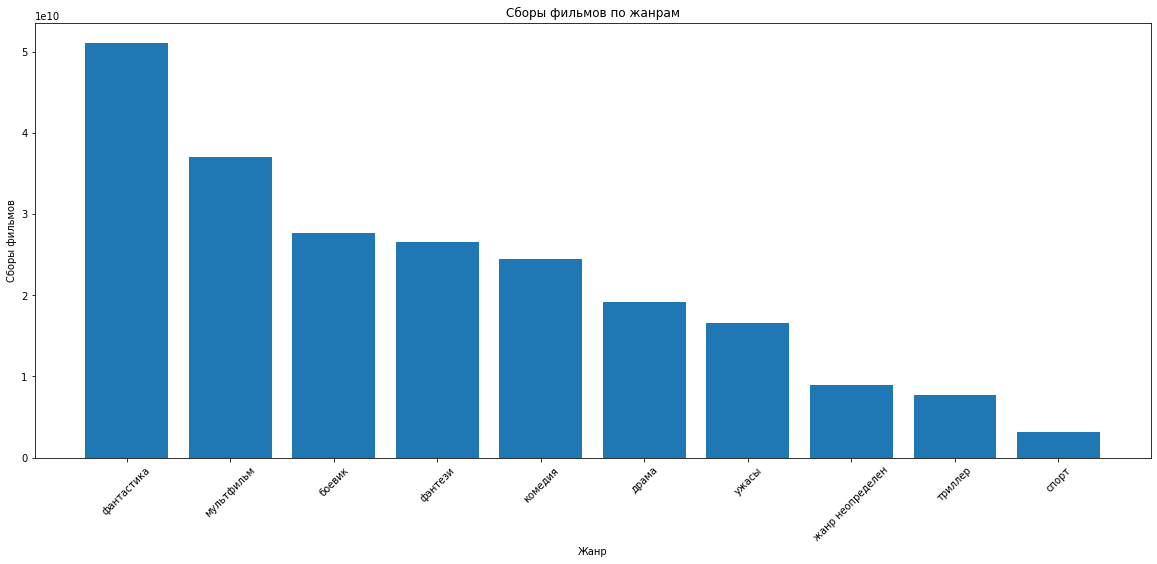

In [79]:
data_genre.loc[7, 'main_genre'] = 'жанр неопределен'

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot()
ax1.bar(data_genre['main_genre'][:10], data_genre['box_office'][:10])
ax1.set_xticks(data_genre['main_genre'][:10])
plt.xticks(rotation = 45)
ax1.set_xticklabels(data_genre['main_genre'][:10])
plt.gca().set(title='Сборы фильмов по жанрам', ylabel='Сборы фильмов', xlabel='Жанр')


plt.savefig('plt', bbox_inches = "tight")
plt.show()

В пятёрку самых кассовых жанровых входят: фантастика, мультфильмы, боевики, фэнтези, комедия

### Вывод

В 2010 году был выпущен в прокат 101 фильм, затем это количество увеличивалось каждый год до значения ~500, в 2017 году был спад - количество выпущенных в прокат фильмов равно ~350. При этом доля фильмов с указанной информацией о прокате в кинотеатрах равна 42%.

Со сборами примерно схожая картина: в 2010 году сумма сборов всех фильмов в прокате составляла 2.4 млн., затем, до 2016 года, сумма увеличивалась, в 2016-2019 годах сумма сборов примерно одинаковая и равна 48.5 млрд. Наибольшая сумма сборов была в 2018 году. Соответственно, медиана и среднее значения с каждым годом увеличивались.

Возрастное ограничение заметно влияет на сборы фильма в прокате: больше всего собирают фильмы 16+, меньше всего - 0+.

Самые популярные жанры среди зрителей - это фантастика, мультфильмы, боевики, фэнтези, комедии.

## Исследовать фильмы, которые получили государственную поддержку

In [33]:
# Для удобства сразу посчитаем общую сумму гос поддержки
data['support'] = data['refundable_support']+data['nonrefundable_support']
data['profit'] = data['box_office']-data['budget']

# Выделим такие фильмы в отдельную таблицу для удобства вычислений
data_support = data[data['budget'].notna()].copy()
display(data_support.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support_part,support,profit
1281,пока еще жива,111005313,2013-10-11 12:00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",16,0.0,26500000.0,79411900.0,министерство культуры,8.100000,"драма,мелодрама",365353.6,2013,а.атанесян,драма,0.333703,26500000.0,-79046546.4
1448,бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,12,0.0,26000000.0,37142857.0,министерство культуры,6.488173,unknown,28140.0,2014,а.якимчук,unknown,0.700000,26000000.0,-37114717.0
1498,невидимки,111004213,2013-09-10 12:00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",12,0.0,107847945.0,176023490.0,фонд кино,5.300000,"комедия,фантастика",19957031.5,2013,р.давлетьяров,комедия,0.612691,107847945.0,-156066458.5
1524,берцы,111004314,2014-05-05 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,16,0.0,28000000.0,40574140.0,министерство культуры,4.200000,драма,55917.5,2014,е.миндадзе (псевдоним катя шагалова),драма,0.690095,28000000.0,-40518222.5
1792,братья ч,111004414,2014-04-23 12:00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",16,0.0,25000000.0,40015122.0,министерство культуры,6.400000,драма,232100.0,2014,м.угаров,драма,0.624764,25000000.0,-39783022.0


In [34]:
# Выделим общую статистику о фильмах с гос. поддержкой по годам
support_year_sum = data_support.groupby('year', as_index=False)['support', 'budget', 'box_office', 'profit'].sum()
support_year_median = data_support.groupby('year', as_index=False)['ratings', 'support_part'].median()

support_year = support_year_sum.merge(support_year_median)
display(support_year)

C:\Users\i\AppData\Local\Temp\ipykernel_13792\2064372604.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  support_year_sum = data_support.groupby('year', as_index=False)['support', 'budget', 'box_office', 'profit'].sum()
C:\Users\i\AppData\Local\Temp\ipykernel_13792\2064372604.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  support_year_median = data_support.groupby('year', as_index=False)['ratings', 'support_part'].median()


,year,support,budget,box_office,profit,ratings,support_part
0,2013,1.343479e+08,2.554354e+08,2.032239e+07,-2.351130e+08,6.7,0.473197
1,2014,5.720023e+08,1.279485e+09,1.017422e+09,-2.620626e+08,6.4,0.582085
2,2015,3.656241e+09,7.309669e+09,5.785285e+09,-1.524384e+09,6.2,0.623736
3,2016,4.303155e+09,7.228943e+09,6.081708e+09,-1.147235e+09,6.1,0.640000
4,2017,3.183972e+09,6.972173e+09,1.086508e+10,3.892903e+09,6.2,0.524780
5,2018,3.446969e+09,6.651695e+09,9.934069e+09,3.282374e+09,6.3,0.594160
6,2019,4.904000e+09,1.254287e+10,8.409627e+09,-4.133239e+09,6.2,0.585982


In [35]:
# Найдём прибыль самых "удачных" фильмов
print(data_support.sort_values(by='profit', ascending=False)['profit'].head(10))

print('Доля фильмов, получивших государственную поддержку, с положительной прибылью равна', 
      data_support[data_support['profit']>0]['profit'].count()/data_support['profit'].count())

7455    2.913569e+09
5652    2.189494e+09
6548    1.707969e+09
5504    1.302560e+09
5707    1.297147e+09
3564    1.038321e+09
2919    7.669715e+08
5640    6.810691e+08
5658    5.847624e+08
2700    5.524097e+08
Name: profit, dtype: float64
Доля фильмов, получивших государственную поддержку, с положительной прибылью равна 0.25


<b>Вывод</b>

Государственную поддержку для фильмов начали выделять в 2013 году. Сумма гос. поддержки постепенно увеличивалась до 2016 года, при этом ежегодно фильмы выходили в минус на сотни миллионов и миллиарды, в 2017-2018 годах сумма поддержки была меньше, чем в 2016, но в эти года фильмы получали положительную прибыль. 2019 год был самый "провальный": по итогам года фильмы ушли в минус на 4.1 млрд. при поддержке 4.9 млрд.

Государственная поддержка обычно составляет 50-60% бюджета фильма, такие фильма в среднем имеют рейтинг 6.4, однако окупаются редко.

Из всех 332 выпущенных в прокат фильмов, получивших гос. поддержку, лишь 6 получили прибыль больше 1 млрд, а всего фильмов с положительной прибылью 25%.

## Написать общий вывод

Количество фильмов, выпускаемых в прокат растёт с каждым годом, также растут и суммы кассовых сборов. По количеству и сумме сбора денег больше всего фильмов с возрастным ограничением 16+, меньше всего - 0+. Самыми популярными жанрами среди зрителей являются: фантастика, мультфильмы, боевики, фэнтези, комедия. 

Фильмы, получившие государственную поддержку в среднем имеют рейтинг выше среднего, однако окупаются редко - всего 25% имеют положительную прибыль. Поэтому можно сказать, что фильмы с государственной поддержкой малоинтересны зрителю.